# Approximation of a Function with ANN


## Loading Dependencies

In [2]:
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt
import numpy as np

## Example Data

In [3]:
sample_size = 1000

In [4]:
x = np.random.random(sample_size)
def f(x):
    return np.sin(x**2 +1)
y = f(x)

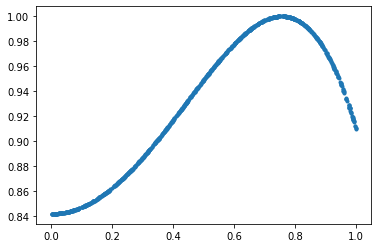

In [5]:
plt.plot(x, y, '.')

In [6]:
def render_history(history):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()
    
    plt.plot(history.history["mean_absolute_error"], label="mean_absolute_error")
    plt.plot(history.history["val_mean_absolute_error"], label="val_mean_absolute_error")
    plt.legend()
    plt.show()
    plt.close()

In [8]:
model = models.Sequential()

model.add(layers.InputLayer(1))
model.add(layers.Dense(8, activation="linear"))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(8, activation="tanh"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 16        
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(
    loss="mean_squared_error",
    metrics=["mean_absolute_error"],
    optimizer="adam"
)

Epoch 1/5
25/25 [==============================] - 0s 6ms/step - loss: 0.1959 - mean_absolute_error: 0.4375 - val_loss: 0.1733 - val_mean_absolute_error: 0.4117
Epoch 2/5
25/25 [==============================] - 0s 2ms/step - loss: 0.1539 - mean_absolute_error: 0.3874 - val_loss: 0.1292 - val_mean_absolute_error: 0.3551
Epoch 3/5
25/25 [==============================] - 0s 2ms/step - loss: 0.1055 - mean_absolute_error: 0.3198 - val_loss: 0.0812 - val_mean_absolute_error: 0.2807
Epoch 4/5
25/25 [==============================] - 0s 2ms/step - loss: 0.0614 - mean_absolute_error: 0.2419 - val_loss: 0.0431 - val_mean_absolute_error: 0.2023
Epoch 5/5
25/25 [==============================] - 0s 2ms/step - loss: 0.0310 - mean_absolute_error: 0.1680 - val_loss: 0.0206 - val_mean_absolute_error: 0.1347


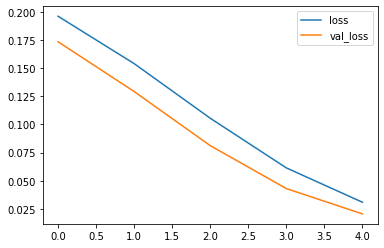

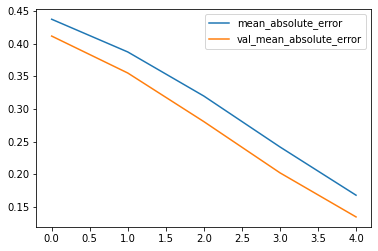

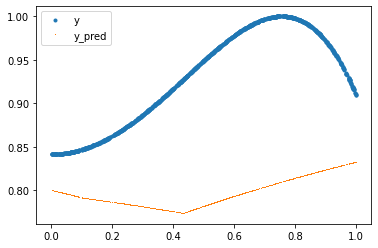

In [10]:
history = model.fit(
    x,
    y,
    epochs=5,
    validation_split=0.2,
)

render_history(history)
y_pred = model.predict(x)
plt.plot(x, y, '.', label="y")
plt.plot(x, y_pred, ',', label="y_pred")
plt.legend()
plt.show()